# README

In [14]:
README = '''
Julian Smoller ~ 4/7/2017

The purpose of this notebook is to play around with images
and create some useful functions. 
'''
print(README)

%run commons.py
%matplotlib inline


Julian Smoller ~ 4/7/2017

The purpose of this notebook is to play around with images
and create some useful functions. 



# Load + show image

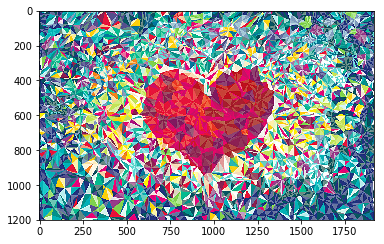

In [2]:
def show(im):
    return imshow(np.asarray(im))

path_in = 'data/input/heart_prism.jpg'
im = Image.open(path_in)
show(im)

# Concat images: horizontal + vertical

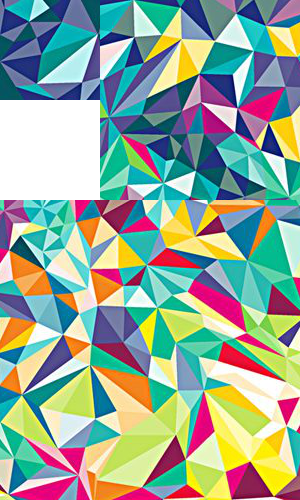

In [3]:
def concatx(images):
    '''Concat images along horizontal axis'''
    width = sum([im.size[0] for im in images])
    length = max([im.size[1] for im in images])
    canvas = Image.new('RGB',(width,length),'white')
    x=0
    for im in images:
        canvas.paste(im,(x,0,x+im.size[0],im.size[1]))
        x += im.size[0]
    return canvas

def concaty(images):
    '''Concat images along vertical axis'''
    width = max([im.size[0] for im in images])
    length = sum([im.size[1] for im in images])
    canvas = Image.new('RGB',(width,length),'white')
    y=0
    for im in images:
        canvas.paste(im,(0,y,im.size[0],y+im.size[1]))
        y += im.size[1]
    return canvas

def put_images_in_rows(images,x_max):
    '''Convert list of images to a list of lists based on x_max,
    so that we know how to concat images horizontally and vertically.'''
    rows = []
    row = []
    w_row = 0
    for im in images:
        if im.size[0] > x_max: # will not fit in any row
            im = im.crop(0,0,x_max,im.size[1]) # crop image at x_max
        if im.size[0]+w_row <= x_max: # will fit in current row
            row.append(im)
            w_row += im.size[0]
        else: # will not fit in current row
            rows.append(row)
            row = [im] # new row
            w_row = im.size[0]
    rows.append(row)
    return rows

def concatxy(images,x_max=2000):
    '''Concat horizontally until x_max pixels, then start a new row'''
    rows = put_images_in_rows(images,x_max=x_max)
    width = max(sum(im.size[0] for im in row) for row in rows) # max width of any row
    length = sum(max(im.size[1] for im in row) for row in rows) # sum height of all rows
    canvas = Image.new('RGB',(width,length),'white')
    y = 0
    for row in rows:
        x = 0
        for im in row:
            canvas.paste(im,(x,y,x+im.size[0],y+im.size[1]))
            x += im.size[0]
        y += max(im.size[1] for im in row)
    return canvas


im1 = im.crop((0,0,100,100))
im2 = im.crop((100,100,300,300))
im3 = im.crop((300,300,600,600))
images = [im1,im2,im3]
concatxy(images,x_max=400)

# Draw color

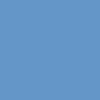

In [4]:
def draw_color(color,w=100,h=100):    
    '''Draw a w by h sized block of given color'''
    color = tuple([int(c) for c in color])
    im = Image.new('RGB',(w,h),color)
    return im
draw_color((100,150,200))

# Draw colors

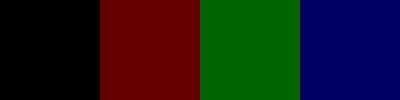

In [5]:
def draw_colors(colors,w=100,h=100):
    '''Draw a series of blocks with given colors; concat into one image'''
    images = [draw_color(c,w=w,h=h) for c in colors]
    return concatxy(images)
colors = [(0,0,0),(100,0,0),(0,100,0),(0,0,100)]
draw_colors(colors)

# Generate colors

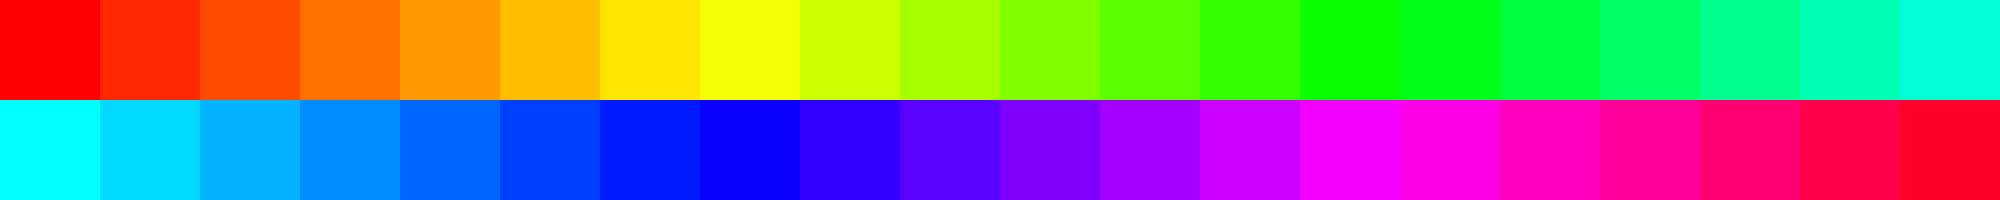

In [6]:
def get_n_hsv(n=5):
    '''Generate n colors in HSV format'''
    return [(x*1.0/n, 1, 1) for x in range(n)]
def get_rgb(hsv):
    '''Convert HSV list to RGB list'''
    return [tuple(map(lambda x: int(x*255),colorsys.hsv_to_rgb(*v))) for v in hsv]
def generate_colors(n=5):
    '''Generate n different colors'''
    hsv = get_n_hsv(n=n)
    rgb = get_rgb(hsv) 
    return rgb
draw_colors(generate_colors(n=40))

# Draw some pretty colors

14


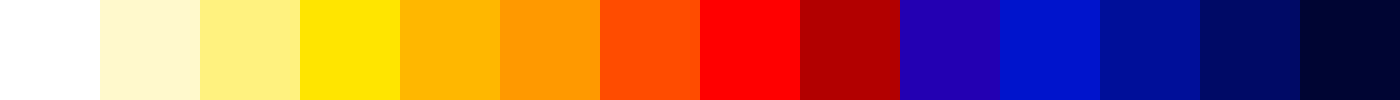

In [7]:
colors = []
colors += [(0,0,1)] # white
colors += [(0.15,0.2,1)] # vanilla
colors += [(0.15,0.5,1)] # yellow
colors += [(0.15,1,1)] # yellow
colors += [(0.12,1,1)] # 
colors += [(0.10,1,1)] # 
colors += [(0.05,1,1)] # 
colors += [(0,1,1)] # red
colors += [(0,1,0.7)] # burgundy
colors += [(0.7,1,0.7)] # purple
colors += [(0.65,1,0.8)] # blue
colors += [(0.65,1,0.6)] # dark blue
colors += [(0.65,1,0.4)] # dark blue
colors += [(0.65,1,0.2)] # very dark blue
print(len(colors))
draw_colors(get_rgb(colors))

# Draw border

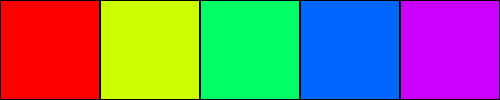

In [13]:
def add_border(block,color=(0,0,0)):
    '''Add a 1-pixel border of given color to block'''
    w, h = block.size
    border = [(0, y) for y in range(h)] # left side
    border += [(w-1,y) for y in range(h)] # right side
    border += [(x,0) for x in range(w)] # top side
    border += [(x,h-1) for x in range(w)] # bottom side
    for xy in border:
        block.putpixel(xy, color)
    return block
concatxy([add_border(draw_color(c)) for c in generate_colors(n=5)])

# Draw dataframe

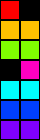

In [12]:
def assign_colors(df,null_color=(0,0,0)):
    '''Assign colors to the unique values in the dataframe, 
    with null values set to null color (default=black);
    returns a dictionary of color --> value'''
    values = pd.Series(np.concatenate([df[c].unique() for c in df.columns])).unique()
    colors = generate_colors(n=len(values))
    value_color = {}
    for i,v in enumerate(values):
        if not pd.isnull(v):
            value_color[v] = colors[i]
    return value_color

def get_canvas_for_df(df,scale=10):
    '''Create a canvas that will fit dataframe with given scale;
    scale = 1 corresponds to 1 pixel per cell of dataframe'''
    width = len(df.columns)*scale
    height = len(df)*scale
    canvas = Image.new('RGB',(width,height),(0,0,0))
    return canvas

def draw_df(df,scale=10,null_color=(0,0,0),border=True,border_color=(0,0,0)):
    '''Render a dataframe as an image of colored blocks, 
    with each color representing a unique value'''
    value_color = assign_colors(df,null_color=null_color)
    canvas = get_canvas_for_df(df,scale=scale)
    for r in df.index:
        for c,col in enumerate(df.columns):
            value = df.ix[r,col]
            color = null_color if pd.isnull(value) else value_color[value]
            block = Image.new('RGB',(scale,scale),color)
            if border:
                block = add_border(block,color=border_color)
            box = (c*scale,r*scale,c*scale+scale,r*scale+scale)
            canvas.paste(block,box)
    return canvas

# Test
df = pd.DataFrame({'a':[0,1,2,None,4,5,6],'b':[None,1,2,3,4,5,6]})
draw_df(df,scale=20)